# Técnicas de Otimização e Ajuste Fino

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


# Overfitting, Underfitting e Generalização

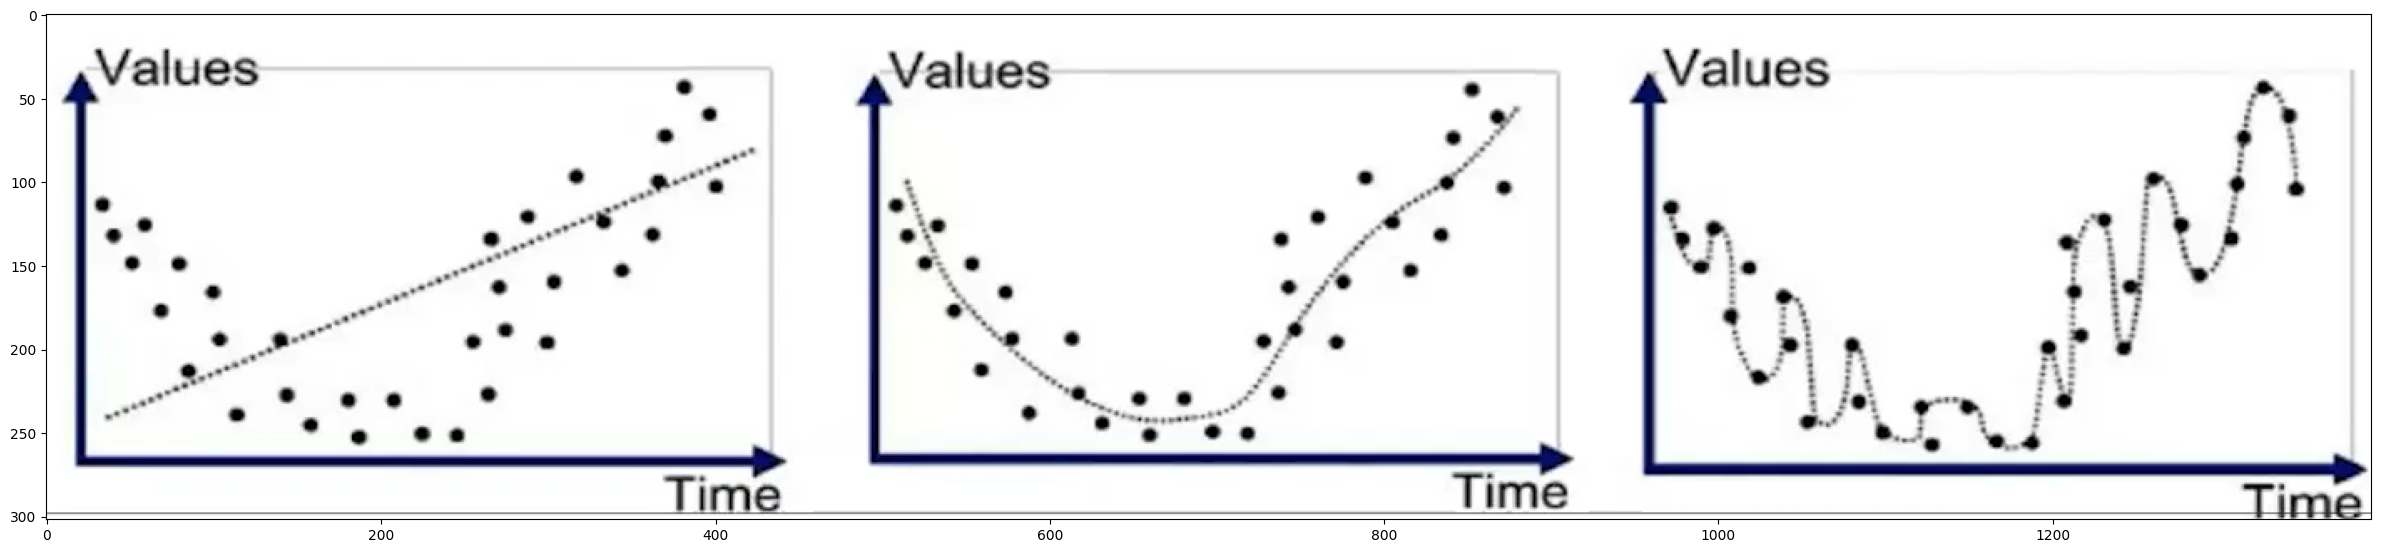

In [2]:
# https://www.researchgate.net/publication/379846879_Utilizing_Machine_Learning_to_Predict_the_Malignancy_of_a_Breast_Tumor
im = plt.imread('tunning1.png')
plt.figure(figsize=(30, 30))
plt.imshow(im)
plt.show()


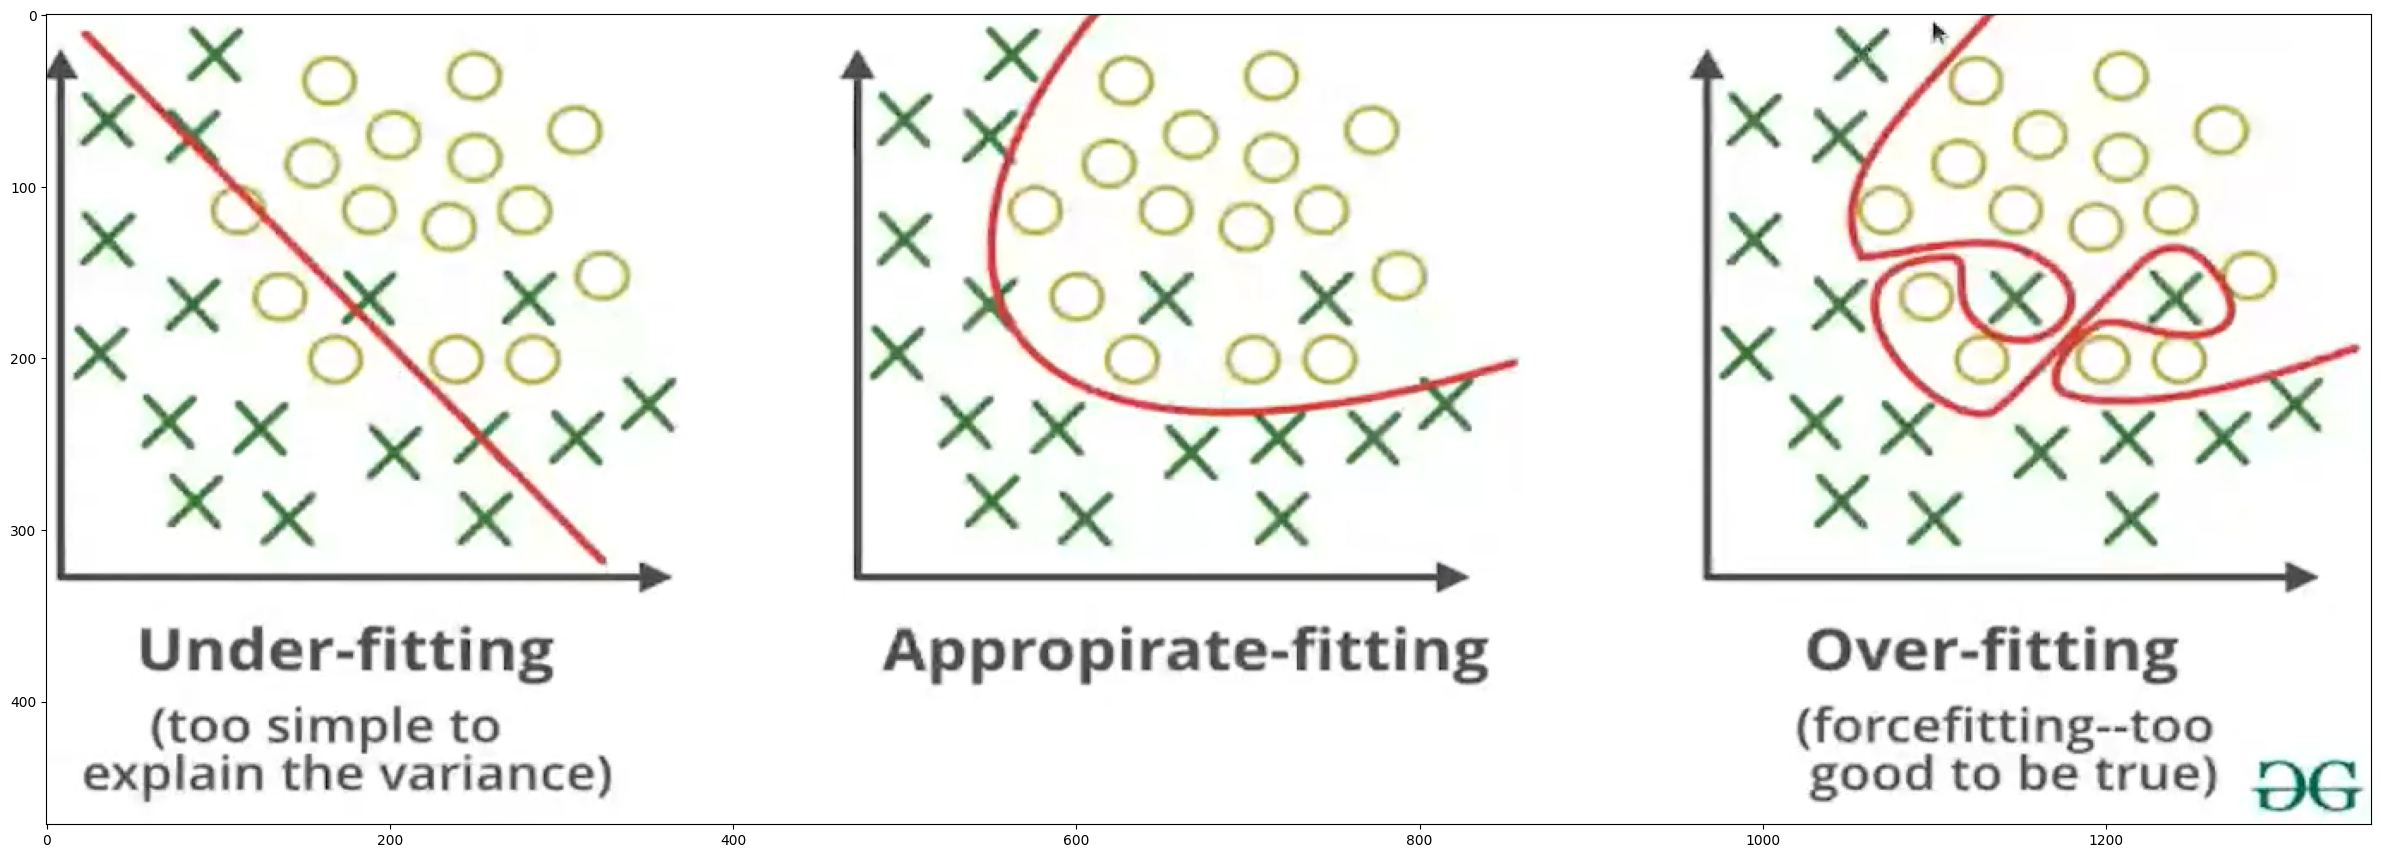

In [3]:
# https://medium.com/@rinu.gour123/deep-neural-networks-with-python-6b599e9b1af9
im = plt.imread('tunning2.png')
plt.figure(figsize=(30, 30))
plt.imshow(im)
plt.show()


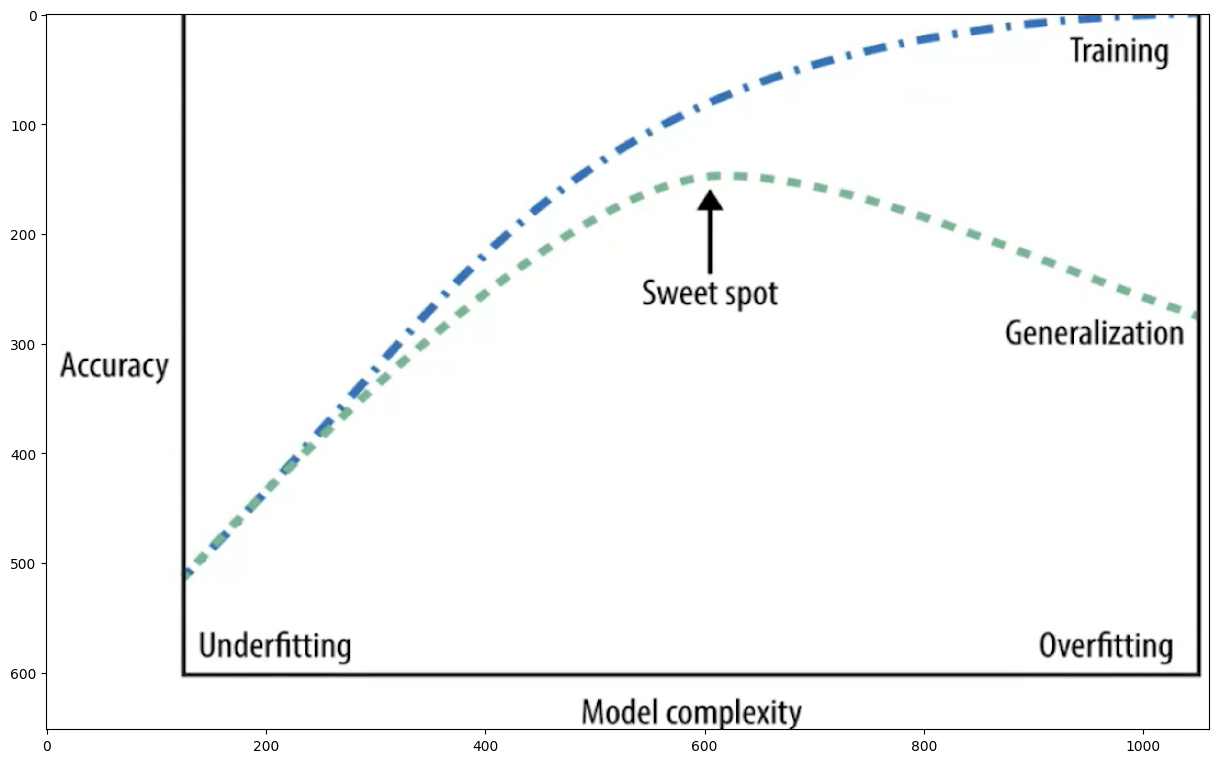

In [4]:
# Livro Introduction to Machine Learning with Python
im = plt.imread('tunning3.png')
plt.figure(figsize=(15, 15))
plt.imshow(im)
plt.show()


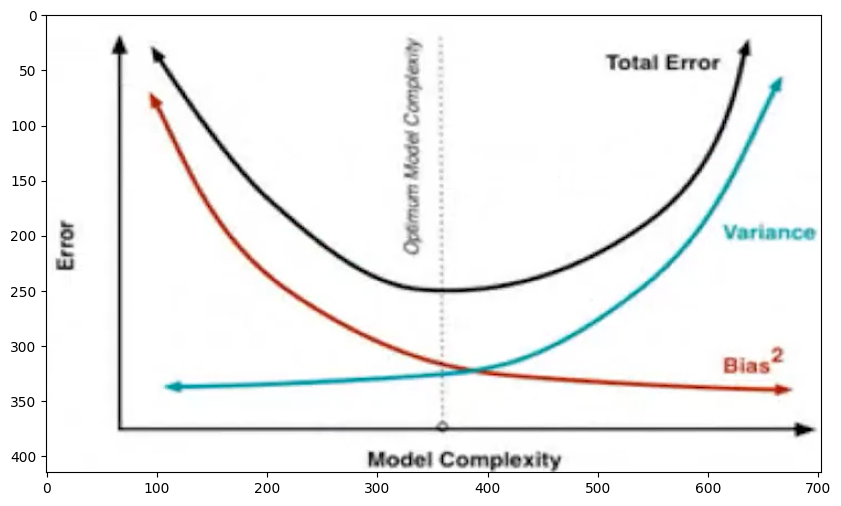

In [5]:
# http://scott.fortmann-roe.com/docs/BiasVariance.html
im = plt.imread('tunning4.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


# Validação Cruzada

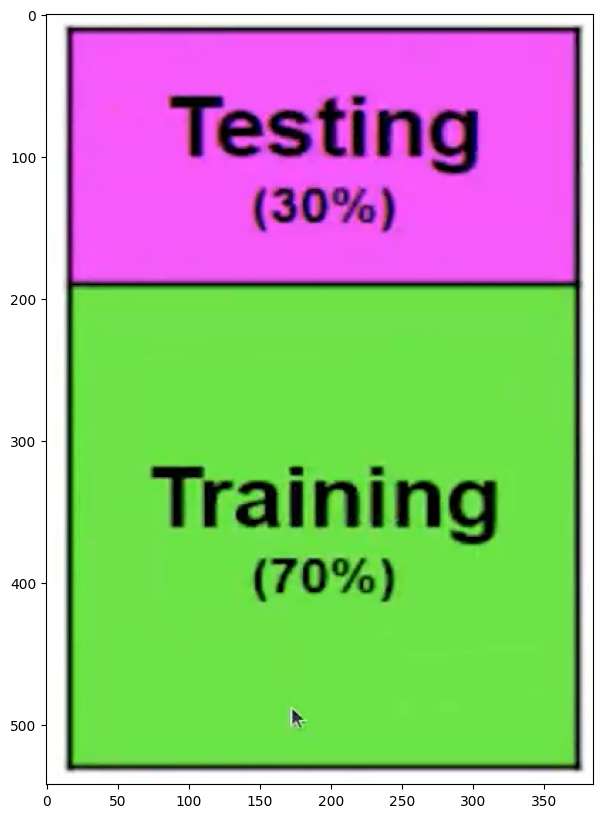

In [6]:
im = plt.imread('cross1.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


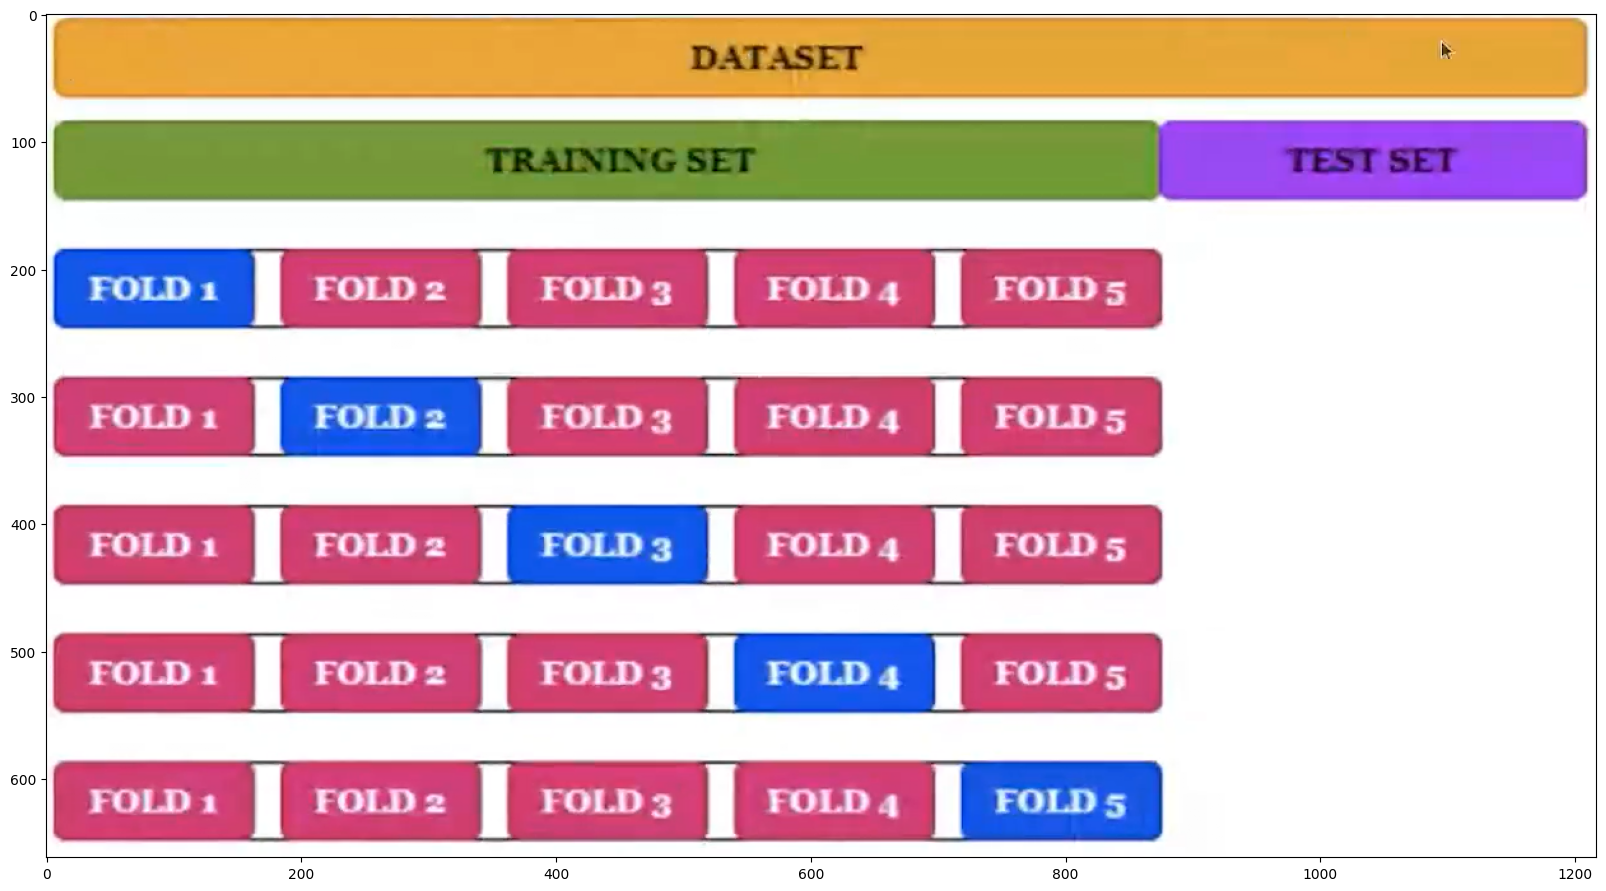

In [7]:
im = plt.imread('cross2.png')
plt.figure(figsize=(20, 20))
plt.imshow(im)
plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [9]:
df = pd.read_csv('kc_house_data.csv')

In [10]:
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']]


In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,221900.0,3,1.00,1180,5650,1.0,0
1,538000.0,3,2.25,2570,7242,2.0,0
2,180000.0,2,1.00,770,10000,1.0,0
3,604000.0,4,3.00,1960,5000,1.0,0
4,510000.0,3,2.00,1680,8080,1.0,0


In [12]:
x = df.drop('price', axis=1)
y = df['price']

In [13]:
# Normalização dos dados
min_max_scaler = StandardScaler()
x = min_max_scaler.fit_transform(x)

In [14]:
linear_regressor = LinearRegression()

In [15]:
# Define o número de folds
k = 5

In [16]:
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [17]:
mape_scores = []

In [18]:
# Realizando o K-Fold Cross-Validation
for train_index, val_index in kf.split(x):
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Treinando o modelo no conjunto de treino
    linear_regressor.fit(x_train, y_train)
    
    # Fazendo previsões no conjunto de validação
    y_pred = linear_regressor.predict(x_val)
    
    # Calculando o erro percentual absoluto médio (MAPE)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    
    # Armazenando o MAPE para cada fold
    mape_scores.append(mape)


In [19]:
mape_scores

[np.float64(0.3439581880058966),
 np.float64(0.3479761037268207),
 np.float64(0.34657027263314866),
 np.float64(0.342947432918732),
 np.float64(0.34968140400493664)]

In [20]:
# Calculando o MAPE médio
mape_mean = np.mean(mape_scores)

print(f'MAPE médio: {mape_mean}')


MAPE médio: 0.3462266802579069


# Separando 10% dos dados para o teste final

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)


In [22]:
linear_regressor = LinearRegression()

In [23]:
k = 5

In [29]:
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [30]:
mape_scores = []

In [38]:
# Realizando o K-Fold Cross-Validation
for train_index, val_index in kf.split(x):
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Treinando o modelo no conjunto de treino
    linear_regressor.fit(x_train, y_train)
    
    # Fazendo previsões no conjunto de validação
    y_pred = linear_regressor.predict(x_val)
    
    # Calculando o erro percentual absoluto médio (MAPE)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    
    # Armazenando o MAPE para cada fold
    mape_scores.append(mape)


In [39]:
# Calculando o MAPE médio
mape_mean = np.mean(mape_scores)

print(f'MAPE médio: {mape_mean}')

MAPE médio: 0.3462266802579069


In [40]:
y_pred = linear_regressor.predict(x_test)


In [41]:
y_pred_2 = linear_regressor.predict(x_test)

In [42]:
mape_test = mean_absolute_percentage_error(y_test, y_pred_2)
mape_test

np.float64(0.3472103019781918)

# Ajuste de Hiperparâmetros

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)


In [44]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [45]:
from sklearn.svm import SVR
svr = SVR()

In [49]:
clf = GridSearchCV(svr, parameters)

In [51]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [52]:
df_results = pd.DataFrame(clf.cv_results_)
df_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.897543,1.438971,1.170658,0.197988,1,linear,"{'C': 1, 'kernel': 'linear'}",-0.001193,0.002392,0.001690,-0.000490,0.009100,0.002300,0.003650,2
1,11.703779,0.145238,9.134501,0.079284,1,rbf,"{'C': 1, 'kernel': 'rbf'}",-0.058082,-0.053739,-0.059771,-0.057534,-0.052944,-0.056414,0.002627,4
2,8.519654,0.256674,0.981668,0.054626,10,linear,"{'C': 10, 'kernel': 'linear'}",0.229087,0.235911,0.242881,0.234096,0.252912,0.238978,0.008252,1
3,12.284835,0.800191,9.485370,0.528562,10,rbf,"{'C': 10, 'kernel': 'rbf'}",-0.031867,-0.030399,-0.031064,-0.033309,-0.024302,-0.030188,0.003099,3


In [53]:
df_results.query("rank_test_score == 1")[['params']]


,params
2,"{'C': 10, 'kernel': 'linear'}"


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Definindo os parâmetros a serem ajustados
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# Criando o modelo
svr = SVR()

# Ajuste fino com validação cruzada
clf = GridSearchCV(svr, parameters, cv=10)

# Treinando o modelo com otimização
clf.fit(x_train, y_train)


In [ ]:
df_results2 = pd.DataFrame(clf.cv_results_)
df_results2


In [ ]:
df_results2.query("rank_test_score == 1")[['params']]


In [ ]:
print(clf.best_params_)
